![Kyphosis](https://www.mdpi.com/applsci/applsci-09-03322/article_deploy/html/images/applsci-09-03322-g002-550.jpg)
**(a)** A normal spine (without kyphosis); **(b)** Patient with abnormal spine (kyphosis).

Problem Statement:

Detecting kyphosis disease at the early stage in children will prevent abnormal spinal vertebrae problems. The problem that we are going to solve here is that given a set of features that describe the absence or presence of kyphosis, our machine learning model must predict whether the kyphosis is present or absent. To train our machine learning model with kyphosis data, we will be using childen dataset Kyphosis

### INPUTS:

    -Age: in months
    -Number: the number of vertebrae involved
    -Start: the number of the first (topmost) vertebra operated on.
### OUTPUT:

    -Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation

In [1]:
## Importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv")
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
data.shape

(81, 4)

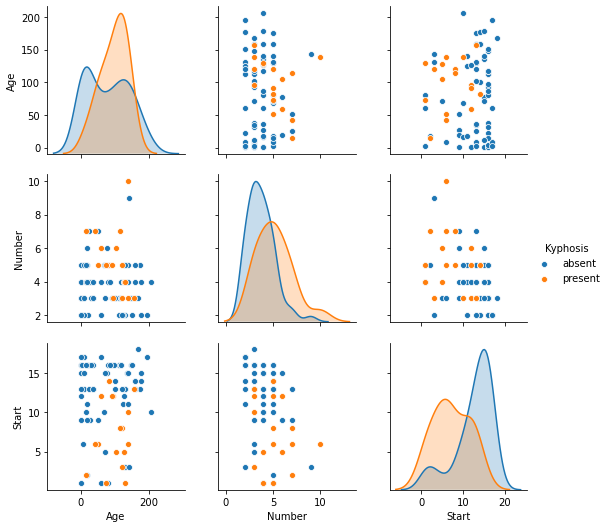

In [4]:
sns.pairplot(data, hue='Kyphosis')

In [5]:
# Splitting the Data set into Input and Output
X = data.iloc[:, 1:]
X = data.drop('Kyphosis', axis=1)
y = data.Kyphosis

In [6]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
# Apply the Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [8]:
X_train

,Age,Number,Start
2,128,4,5
35,93,3,16
33,112,3,16
45,139,3,10
15,1,3,16
66,195,2,17
56,2,3,13
19,27,4,9
61,114,7,8
73,206,4,10


In [9]:
y_train

2     present
35     absent
33     absent
45    present
15     absent
66     absent
56     absent
19     absent
61    present
73     absent
67     absent
26     absent
79    present
65     absent
44     absent
42     absent
60    present
80     absent
21    present
70     absent
3      absent
48    present
54     absent
43     absent
51     absent
24    present
8      absent
17     absent
0      absent
78     absent
       ...   
13     absent
22    present
32     absent
30     absent
55     absent
49     absent
41     absent
59     absent
23     absent
4      absent
68     absent
14     absent
29     absent
28     absent
11     absent
18     absent
20     absent
50     absent
25     absent
6      absent
71     absent
1      absent
16     absent
64     absent
5      absent
75     absent
9     present
72     absent
12     absent
37    present
Name: Kyphosis, Length: 64, dtype: object

In [10]:
# Predict on training data
y_train_pred = dtree.predict(X_train)
y_train_pred

array(['present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present'], dtype=object)

In [11]:
# Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [12]:
confusion_matrix(y_train, y_train_pred)

array([[51,  0],
       [ 0, 13]], dtype=int64)

In [13]:
# Prediction on test data(unseen data)
# Syntax: objectname.predict(InputValues)
y_test_pred = dtree.predict(X_test) # corresponding output of X_test is stored in y_test
# Compare the actual y_test values with model predicted y_test_pred values
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

      absent       0.73      0.85      0.79        13
     present       0.00      0.00      0.00         4

    accuracy                           0.65        17
   macro avg       0.37      0.42      0.39        17
weighted avg       0.56      0.65      0.60        17



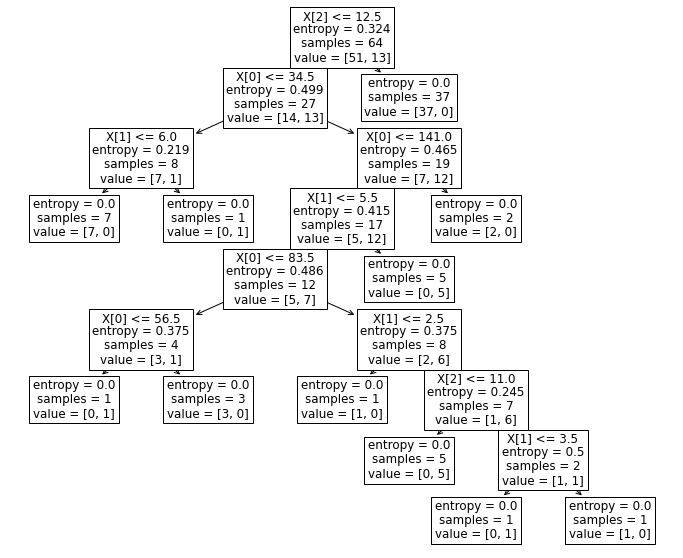

In [14]:
# Visualization of the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
plt.figure(figsize=(12,10))
tree.plot_tree(dtree)
plt.show()

In [15]:
# KFOLD CV:
from sklearn.model_selection import cross_val_score
cross_val_score(dtree, X_train, y_train, cv=3)

array([0.81818182, 0.9047619 , 0.85714286])

In [16]:
# Hyperparameters
grid_param = {'criterion' : ['gini', 'entropy'],'max_depth' : range(2, 10, 1), 'min_samples_leaf' : range(1,10,1)}

In [17]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dtree, param_grid=grid_param)
grid_search.fit(X_train, y_train)

C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                    

In [18]:
# return the optimal parameters
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4}

In [19]:
# We have to build the model with best parameters
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
# Prediction on test data
pred_test = clf.predict(X_test)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

      absent       0.85      0.85      0.85        13
     present       0.50      0.50      0.50         4

    accuracy                           0.76        17
   macro avg       0.67      0.67      0.67        17
weighted avg       0.76      0.76      0.76        17



### Random Forest Classification

In [21]:
# Import , initialize and fit
# Import the RFC from sklearn
from sklearn.ensemble import RandomForestClassifier
# intialize the object for RFC
rfc = RandomForestClassifier(n_estimators = 40)
# fit the RFC to the dataset
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
# Predictions on Training data
# Syntax: objectname.predict(Inputvalues)
y_pred_train = rfc.predict(X_train)
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [23]:
# Prediction on test data(unseen data)
y_pred_test = rfc.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

      absent       0.75      0.92      0.83        13
     present       0.00      0.00      0.00         4

    accuracy                           0.71        17
   macro avg       0.38      0.46      0.41        17
weighted avg       0.57      0.71      0.63        17



In [24]:
#CrossValidationsScore
from sklearn.model_selection import cross_val_score
scores  = cross_val_score(rfc, X_train, y_train, cv=5)
np.mean(scores)

0.8562271062271062